# Cross-swath analysis

Cross-swath profile refers to swath analysis along tranverse rather than longitudinal direction. It has been demonstrated useful in many previous studies [(e.g., Foster et al. 2010 or Dortch et al. 2011)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008JF001135).

However, these research have restricted the cross-swath inside of a rectangular box, which without reference to geomorphic irregular boudary and are oftentimes subjective about their lengths and orientations.

To address these shorcomings, PyOSP provides more powerful and objective method to perform cross-swath analysis.

## Step 1. Generate a swath objective

We use the same synthetic landscape that being used in the section [Fixed-width curvilinear swath profile](./fix_width_curv.ipynb). 



In [1]:
import pyosp

baseline = pyosp.datasets.get_path("homo_baseline.shp") # the path to baseline shapefile
raster = pyosp.datasets.get_path("homo_mount.tif")  # the path to raster file

elev = pyosp.Elev_curv(baseline, raster, width=100,
                       min_elev=0.01,
                       line_stepsize=3, cross_stepsize=None)

Processing: [#########################] 71 of 71 lineSteps

## Step 2. Define the starting and ending location of cross-swath

As we demonstrated in previous section, the starting and ending locations can be either defined by inputing values indicating distances from the starting point of baseline, or using points drawn on the baseline to specify the starting and ending locations. Here, we use the second method to bound the area. 

<img alt="homo_case" src="https://i.imgur.com/9QUKGDT.png" height="250"/>

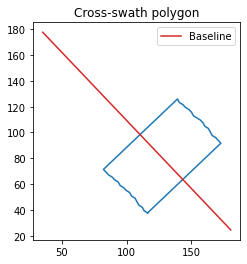

In [2]:
import matplotlib.pyplot as plt
from pyosp import point_coords, read_shape

pointsPath = pyosp.datasets.get_path("homo_start_end.shp") # the path to the points

pointsCoords = point_coords(pointsPath)

# The sequence of the points follows drawing order on the map
# In this case, we drew the ending point first.
starting = pointsCoords[1]
ending = pointsCoords[0]

# let's verify the locations by polygon (optional)
# read the baseline shape
line_shape = read_shape(baseline)
lx, ly = line_shape.xy

fig, ax = plt.subplots()
swath_polygon = elev.out_polygon(start=starting, end=ending)
px, py = swath_polygon.exterior.xy
ax.plot(px, py)
ax.plot(lx, ly, color='C3', label="Baseline")
ax.set_aspect('equal', adjustable='box')
ax.set_title("Cross-swath polygon")
ax.legend()

## Step 3. Plot the cross-swath profile

The cross-swath profile can be easily plotted by method *cross_plot*. The distance along x-axis means the transvers distance from the baseline.



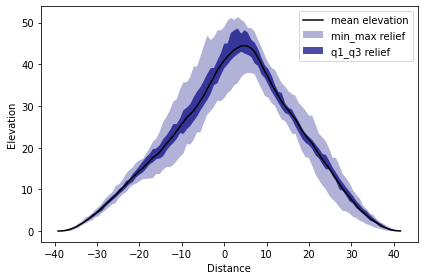

In [3]:
elev.cross_plot(start=starting, end=ending)

## Step 4. Plot scatters with cross-swath profile (optional)

Note we can also plot scatters with cross-swath, just serve the path of points shapefile to the *cross_plot* method

<img alt="homo_case" src="https://i.imgur.com/AM5fnnC.png" height="250"/>


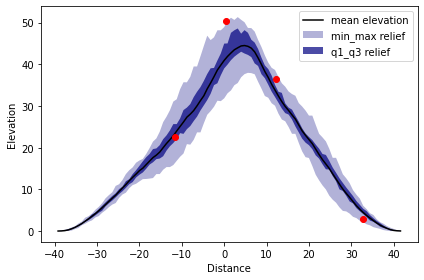

In [4]:
checkingPoints = pyosp.datasets.get_path("checking_points.shp") # the path to the points

fig, ax = plt.subplots()
# Note parameter "color" means color of swath profile, "c" and additional
# parameters are passed to the Matplolib scatter function.
elev.cross_plot(ax=ax, start=starting, end=ending, points=checkingPoints, color="navy", c="red")

Noticing that some points are out of range of cross-swath along longitudinal axis, but they are still projected to the swath profile. If it is not desired, user should delete all unwanted points before the analysis.